In [1413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1414]:
##Import data

items_df = pd.read_csv("C:/Users/תאיר זוהר/OneDrive/Desktop/איקום/קבצי עזר/Items.csv") 
orders_df = pd.read_csv("C:/Users/תאיר זוהר/OneDrive/Desktop/איקום/קבצי עזר/orders.csv")  
order_item_df = pd.read_csv("C:/Users/תאיר זוהר/OneDrive/Desktop/איקום/קבצי עזר/order_item.csv")  
customers_df = pd.read_csv("C:/Users/תאיר זוהר/OneDrive/Desktop/איקום/קבצי עזר/customers.csv")

In [1415]:
##copy data

items_df_copy = items_df.copy()
orders_df_copy = orders_df.copy()
order_item_df_copy = order_item_df.copy()
customers_df_copy = customers_df.copy()

In [1416]:
##Exc 1- item_df_handle_duplicate

duplicate_name_brand_rows = items_df_copy[items_df_copy.duplicated(subset=['item_name', 'item_brand'], keep=False)]
duplicate_name_brand_rows


with_brand = items_df_copy[items_df_copy['item_brand'].notnull()]
without_brand = items_df_copy[items_df_copy['item_brand'].isnull()]
duplicated_names = with_brand[with_brand['item_name'].isin(without_brand['item_name'])]
brand_vs_no_brand_rows = pd.concat([duplicated_names, without_brand[without_brand['item_name'].isin(duplicated_names['item_name'])]])
brand_vs_no_brand_rows

##Remove duplicate 'brand_vs_no_brand_rows' according to logic
items_ids_map = {8: 49}
items_df_copy.set_index('id', inplace=True)
items_df_copy.drop(items_ids_map.keys(), axis=0, inplace=True)
items_df_copy.reset_index('id')
items_df_copy


##replace removed item id with the item that we didn't remove
order_item_df_copy['item_id'] = order_item_df_copy['item_id'].replace(items_ids_map)

In [1417]:
##Exc 2- customer_df_handle_duplicate
##Remove duplicate emails according to logic

duplicate_email_rows = customers_df[customers_df.duplicated('email', keep=False)]
duplicate_name_brand_rows

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability


In [1418]:
##Exc 3 - Handle missing data in all datasets

##missing data in items_df_copy
missing_data = items_df_copy.isnull().sum()
percentage_missing = items_df_copy.isnull().sum() * 100 / items_df_copy.isnull().count()
total_rows = items_df_copy.isnull().count()
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Rows', 'Precent'])
final_missing_data

##Fill missing data with default values:
items_df_copy['item_category'] = items_df_copy['item_category'].fillna('Unknown')
items_df_copy['stock_quantity'] = items_df_copy['stock_quantity'].fillna('Unknown')

##remove rows of less than 5% missing data in a specific column
items_df_copy = items_df_copy.dropna(subset=['item_brand'])

## Drop rows from order_item_df that are pointing to the missing items
items_df_copy.reset_index(inplace=True)
order_item_df_copy = order_item_df_copy[order_item_df_copy['item_id'].isin(items_df_copy['id'])]


##missing data in orders_df_copy
missing_data = orders_df_copy.isnull().sum()
percentage_missing = orders_df_copy.isnull().sum() * 100 / orders_df_copy.isnull().count()
total_rows = orders_df_copy.isnull().count()
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Rows', 'Precent'])
final_missing_data

##remove rows with missing customer_id
orders_df_copy = orders_df_copy.dropna(subset=['customer_id'])

##Fill missing data with default values:
orders_df_copy['delivery_days'] = orders_df_copy['delivery_days'].fillna(round(orders_df_copy['delivery_days'].mean()))


##missing data in customers_df_copy
missing_data = customers_df_copy.isnull().sum()
percentage_missing = customers_df_copy.isnull().sum() * 100 / customers_df_copy.isnull().count()
total_rows = customers_df_copy.isnull().count()
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Rows', 'Precent'])
final_missing_data

## Fill missing data with default values:
customers_df_copy['gender'] = customers_df_copy['gender'].fillna('Unknown')
customers_df_copy['age'] = customers_df_copy['age'].fillna(round(customers_df_copy['age'].mean()))
customers_df_copy['joining_date'] = customers_df_copy['joining_date'].fillna('UnKnown')


##missing data in order_item_df_copy
missing_data = order_item_df_copy.isnull().sum()
percentage_missing = order_item_df_copy.isnull().sum() * 100 / order_item_df_copy.isnull().count()
total_rows = order_item_df_copy.isnull().count()
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total Rows', 'Missing Rows', 'Precent'])
final_missing_data

,Total Rows,Missing Rows,Precent
Unnamed: 0,920,0,0.0
id,920,0,0.0
order_id,920,0,0.0
item_id,920,0,0.0
quantity,920,0,0.0


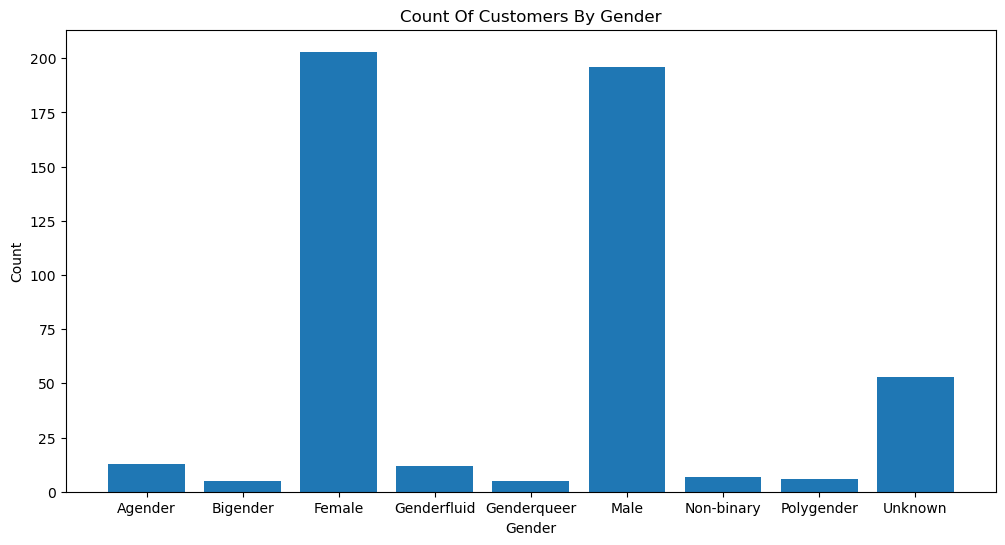

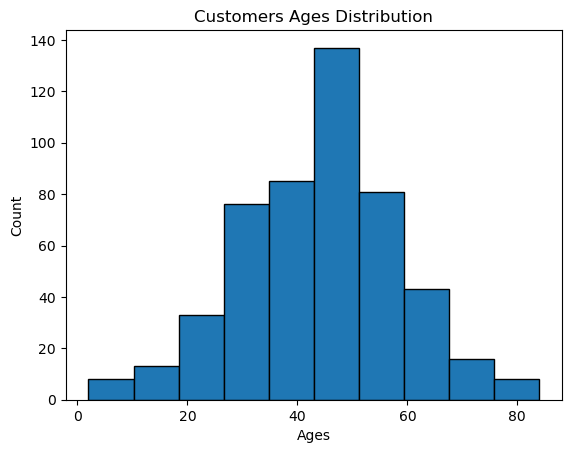

the year with most joining customers to the company is 2022


year,2020.0,2021.0,2022.0
month,,,
1.0,9,3,17
2.0,12,12,19
3.0,7,11,12
4.0,11,16,7
5.0,13,13,14
6.0,12,15,7
7.0,10,9,10
8.0,12,18,18
9.0,11,14,9


In [1419]:
## Data Analysis

## Exe 1 - Explore customers_df_copy

## a - Count the number of customers by gender
df_gender_count = customers_df_copy.groupby('gender').size()
df_gender_count = df_gender_count.reset_index(name='count')
df_gender_count

plt.figure(figsize=(12,6))
plt.bar(df_gender_count['gender'], df_gender_count['count'])
plt.title('Count Of Customers By Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## b - Plot the customers ages distribution with histogram chart
plt.hist(customers_df_copy['age'], bins=10, edgecolor='black')
plt.title('Customers Ages Distribution')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.show()

## c- find what is the year with most joining customers to the company - helped with GPT to convert 'UnKnown' values to datetime
customers_df_copy['joining_date'] = customers_df_copy['joining_date'].replace('Unknown', pd.NaT)
customers_df_copy['joining_date'] = pd.to_datetime(customers_df_copy['joining_date'], errors='coerce')
customers_df_copy.set_index('joining_date', inplace=True)
df_resample = customers_df_copy.resample(rule='YE').size()
df_resample = df_resample.reset_index(name='joins')
df_resample_best_year = df_resample[df_resample['joins']==df_resample['joins'].max()]
print(f'the year with most joining customers to the company is {df_resample_best_year['joining_date'].dt.year.iloc[0]}')

##d - we can see from the results that there is no increasing trend from 2020 to 2021. But from 2021 to 2022 there is increasing trend. So i can say that it is unpredictable pattern

##e
customers_df_copy['year'] = customers_df_copy.index.year
customers_df_copy['month'] = customers_df_copy.index.month

monthly_joins_by_year = customers_df_copy.pivot_table(
    index='month', 
    columns='year', 
    aggfunc='size', 
    fill_value=0
)
monthly_joins_by_year

## we can see that there is no clear trend of joins by month.

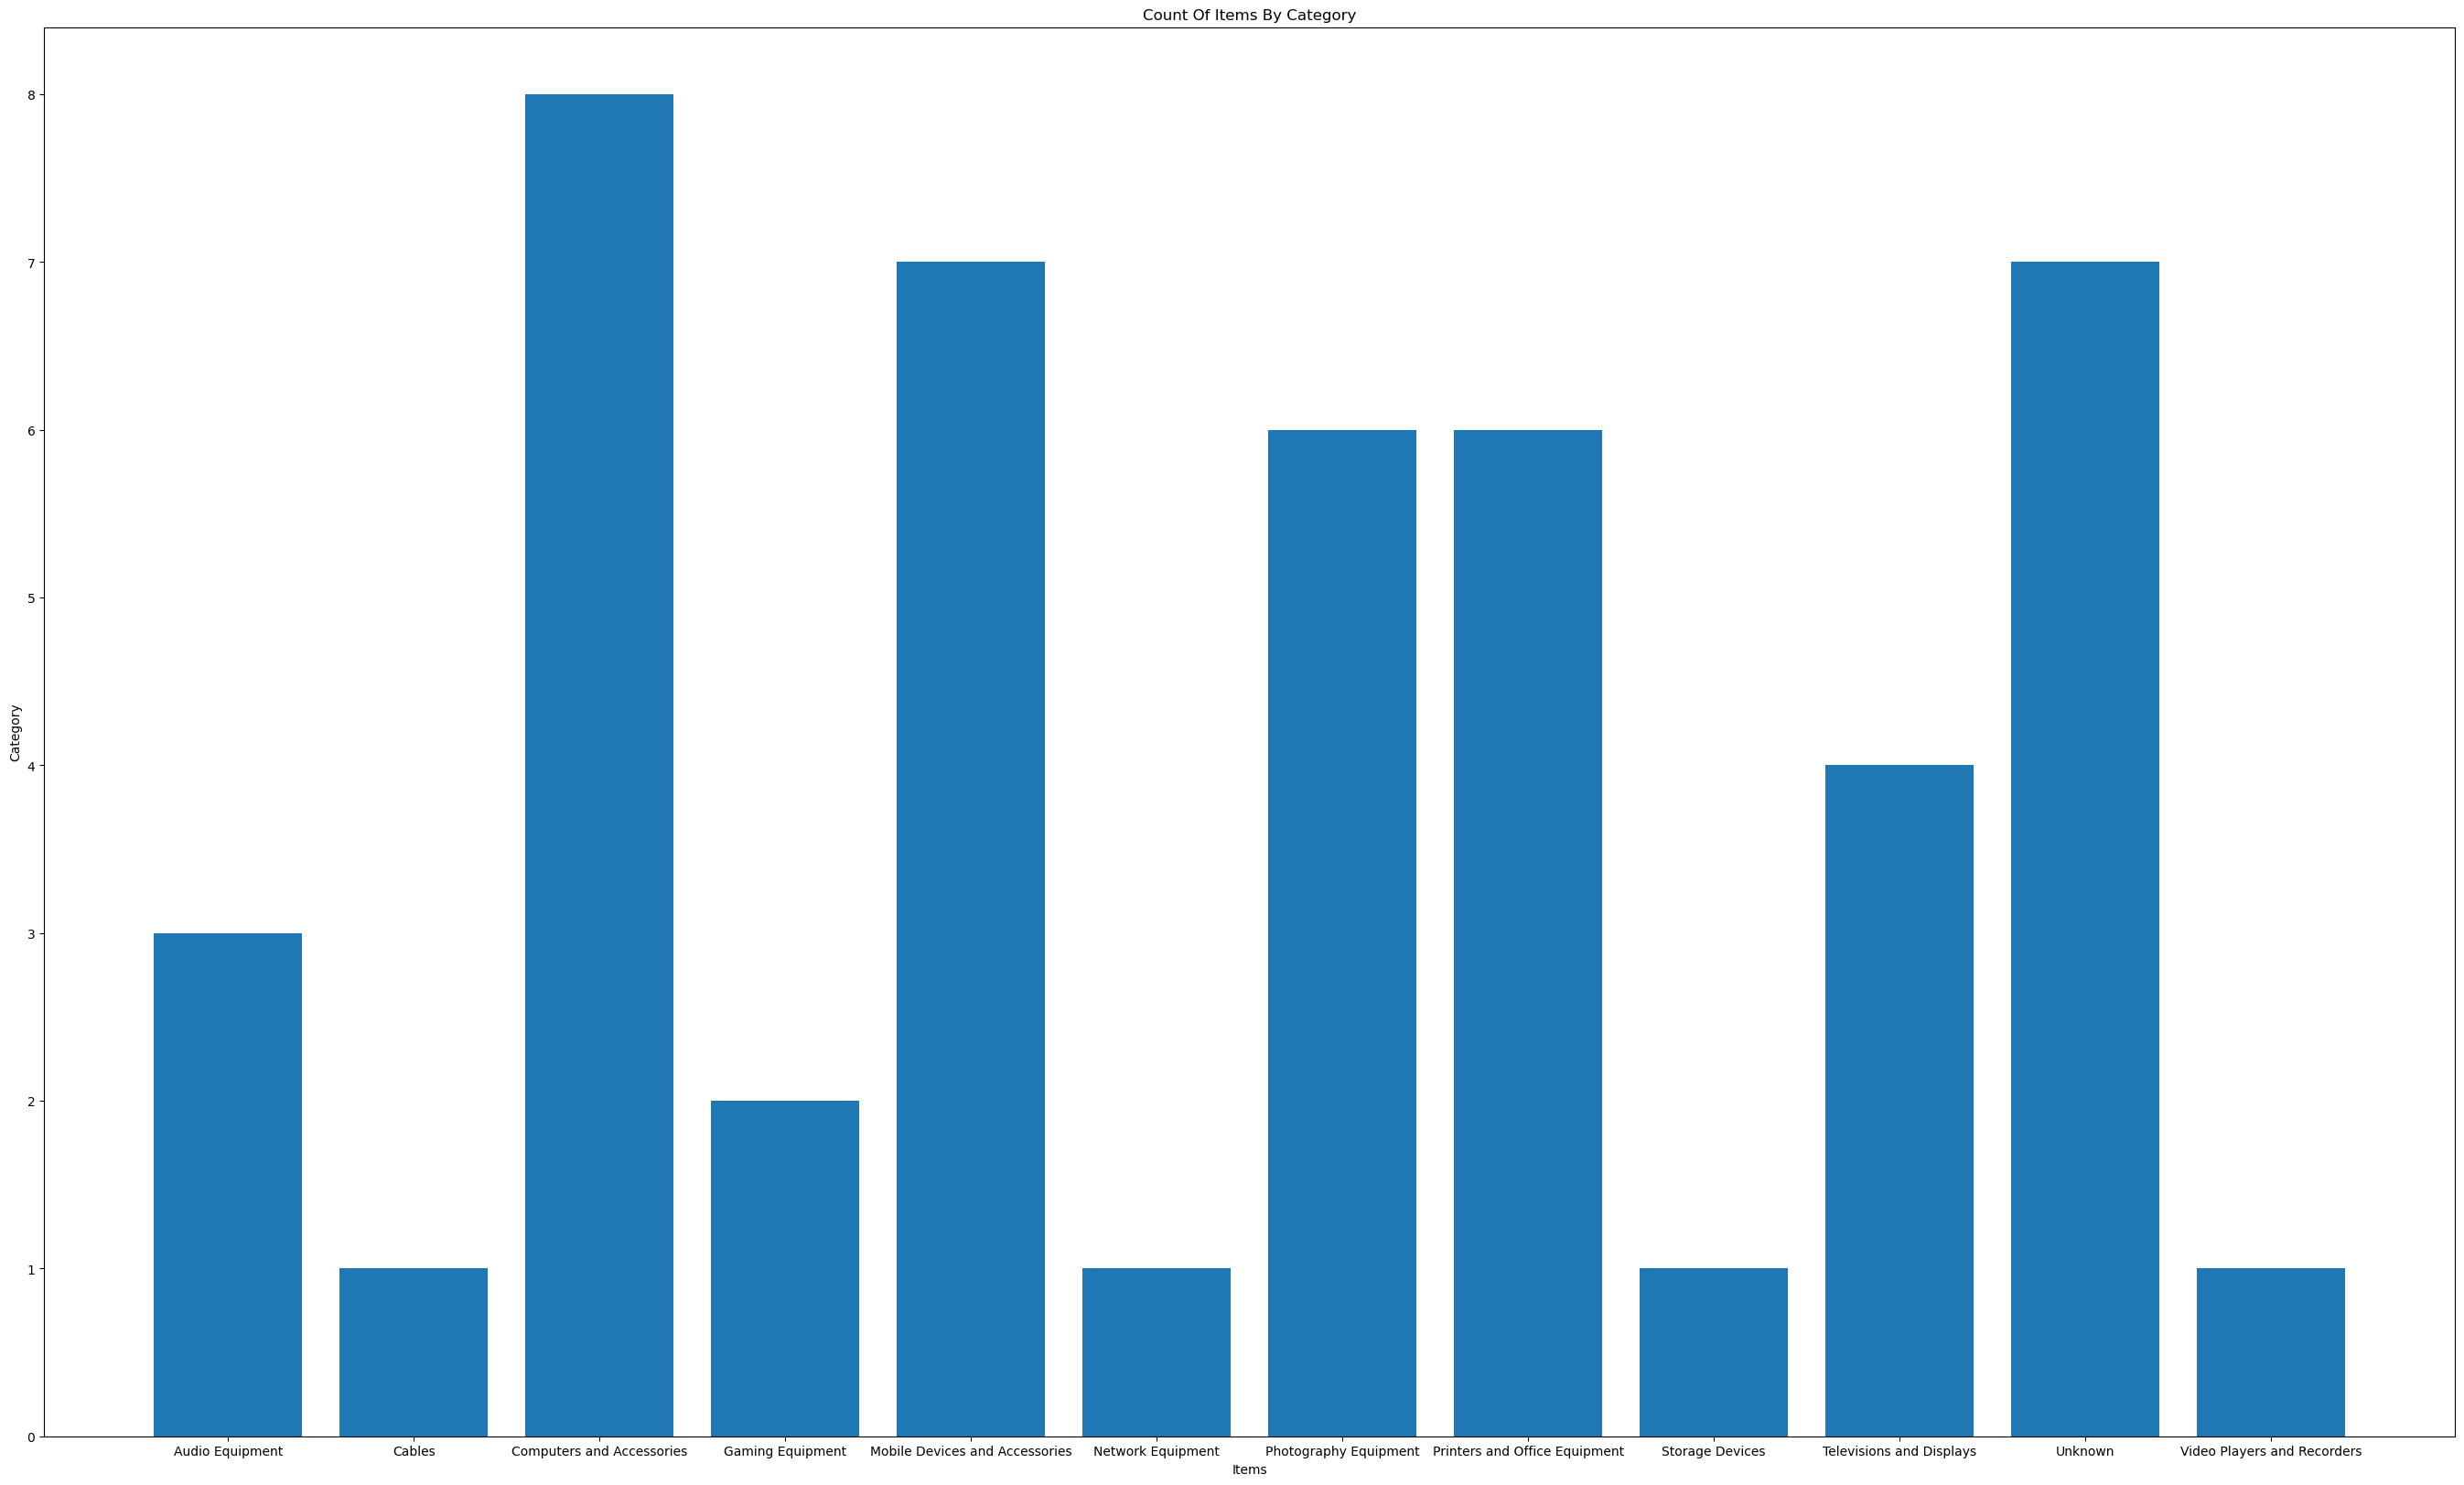

the mean quantity in stock of all items is 749.7209302325581


In [1420]:
## Exe 2 - Explore items_df_copy

## a - Count the number of items by category
items_by_category_df = items_df_copy.groupby('item_category').size()
items_by_category_df = items_by_category_df.reset_index(name='count')
items_by_category_df

plt.figure(figsize=(34, 20))
plt.bar(items_by_category_df['item_category'], items_by_category_df['count'])
plt.title('Count Of Items By Category')
plt.xlabel('Items')
plt.ylabel('Category')
plt.show()

##b - the item with largest quantity in stock and the lowest quantity in stock 
items_df_copy['stock_quantity'] = pd.to_numeric(items_df_copy['stock_quantity'], errors='coerce')
no_stock_default_values_items = items_df_copy[items_df_copy['stock_quantity'].notna()]
sorted_quantity = no_stock_default_values_items.sort_values('stock_quantity', ascending=False)
highest_and_lowest_quantitys = pd.concat([sorted_quantity.head(1), sorted_quantity.tail(1)])
highest_and_lowest_quantitys

##c- Calculate the mean quantity in stock of all items
mean_items_quantity = no_stock_default_values_items['stock_quantity'].mean()
print(f'the mean quantity in stock of all items is {mean_items_quantity}')

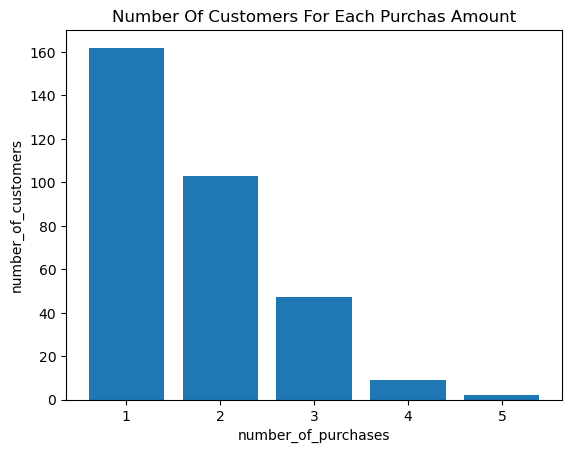

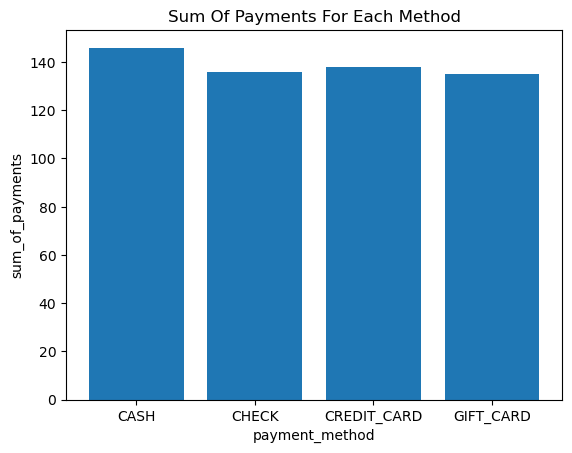

In [1429]:
## Exe 3 - Explore orders_df_copy

## a - Calculate the amount of customers who have made just asingle purchase, those who have made two, three, four purchases, and so forth.


purchas_per_customer = orders_df_copy.groupby('customer_id').size()
purchas_per_customer = purchas_per_customer.reset_index(name='number_of_purchases')
purchas_per_customer
number_of_customers_for_purchas_amount = purchas_per_customer.groupby('number_of_purchases').size()
number_of_customers_for_purchas_amount = number_of_customers_for_purchas_amount.reset_index(name='number_of_customers')
number_of_customers_for_purchas_amount

plt.bar(number_of_customers_for_purchas_amount['number_of_purchases'],number_of_customers_for_purchas_amount['number_of_customers'])
plt.title('Number Of Customers For Each Purchas Amount')
plt.xlabel('number_of_purchases')
plt.ylabel('number_of_customers')
plt.show()


##b - Find the top 5 customers (customer id, first name and last name) that ordered the most orders.
customers_df_copy = customers_df_copy.reset_index('joining_date')
customers_df_copy
sorted_number_of_purchases = purchas_per_customer.sort_values('number_of_purchases', ascending = False)
top_5_customers = sorted_number_of_purchases.head(5)
customers_merge = top_5_customers.merge(customers_df_copy, left_on='customer_id', right_on='id', how='inner')
top_5_details = customers_merge[['customer_id','first_name','last_name','number_of_purchases']]
top_5_details


##c- Calculate for each payment method how many customers are paying with it.
payment_method_sum = orders_df_copy.groupby('payment_method').size()
payment_method_sum = payment_method_sum.reset_index(name='sum_of_payments')
payment_method_sum

plt.bar(payment_method_sum['payment_method'],payment_method_sum['sum_of_payments'])
plt.title('Sum Of Payments For Each Method')
plt.xlabel('payment_method')
plt.ylabel('sum_of_payments')
plt.show()

the max total price is 1607447.0699999998
the min total price is 356.81
the mean total price is 181480.8143063063


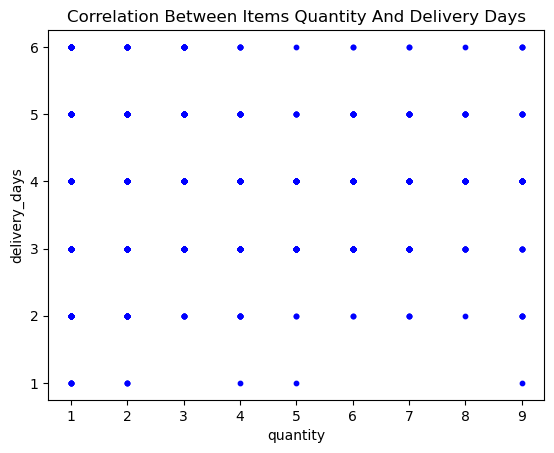

number of never ordered customers is 177


,item_id,item_name,total_quantity
0,29.0,Webcam,25
1,33.0,Surge Protector,27
2,21.0,External Hard Drive,33
3,28.0,CCTV Camera,34
4,6.0,Printer,37


In [1497]:
## Exe 4 - Explore all data sets

## a -  Add a new column to the orders.csv dataset that show the total price of each order.
orders_to_order_item_merge = orders_df_copy.merge(order_item_df_copy, on='order_id', how='inner')
items_table_merge = orders_to_order_item_merge.merge(items_df_copy, left_on='item_id',right_on='id', how='inner')
orders_df_copy['total_price'] = items_table_merge['item_id']*items_table_merge['quantity']*items_table_merge['item_price']
orders_df_copy


##b - Use the total_price column you calculated in the previous exercise and show what is the max, min and mean of the orders total price.
print(f'the max total price is {orders_df_copy["total_price"].max()}')
print(f'the min total price is {orders_df_copy["total_price"].min()}')
print(f'the mean total price is {orders_df_copy["total_price"].mean()}')


## c- Investigate if there is a correlation between the number of items in order and the delivery time
plt.scatter(items_table_merge['quantity'],items_table_merge['delivery_days'],color='blue', s=10)
plt.title('Correlation Between Items Quantity And Delivery Days')
plt.xlabel('quantity')
plt.ylabel('delivery_days')
plt.show()
##from the scatter plot we can see that there is no correlation between item quantity and delivery time


##d - Find how many customers never created any order.
never_ordered_customers = customers_df_copy[~customers_df_copy['id'].isin(orders_df_copy['customer_id'])]
print(f'number of never ordered customers is {len(never_ordered_customers)}')


##e - Find what are the top 5 items that has been ordered the lowest
total_quantity_for_item = order_item_df_copy.groupby('item_id')['quantity'].sum().reset_index(name='total_quantity')
total_quantity_for_item = total_quantity_for_item.sort_values('total_quantity', ascending = True)
lowest_5_items = total_quantity_for_item.head(5)
lowest_5_items= lowest_5_items.merge(items_df_copy, right_on='id', left_on='item_id', how='inner')
final_result = lowest_5_items[['item_id','item_name','total_quantity']]
final_result